# **BDM-3035 Big Data Capstone Project**
Instructor: Meysam Effati

Members:


*   Ann Margaret Silva (C0903604)
*   Antonio Carlos De Mello Mendes (C0866063)

*   Maria Jessa Cruz (C0910329)
*   Prescila Mora (C0896891)


*   Rewant Sharma (C0894265)



Datasets:

*https://cwfis.cfs.nrcan.gc.ca/background/summary/fwi*

*https://cwfis.cfs.nrcan.gc.ca/background/summary/fbp*


# **Wildfire Prediction Data**

In [20]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

Load the Data

In [21]:
# Load the cleaned data
cleaned_csv_path = '//workspaces/WildFireSimulation/wildfire_cleandata.csv'
geo_wfp = pd.read_csv(cleaned_csv_path)

/tmp/ipykernel_16181/1794545798.py:3: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  geo_wfp = pd.read_csv(cleaned_csv_path)


In [22]:
# Convert to GeoDataFrame
geo_wfp = gpd.GeoDataFrame(geo_wfp, geometry=gpd.points_from_xy(geo_wfp.lon, geo_wfp.lat))

In [23]:
geo_wfp

,_id,lat,lon,rep_date,source,sensor,satellite,agency,temp,rh,...,cfb,pcuring,greenup,elev,sfl,cfl,tfc0,ecozone,sfc0,geometry
0,6669b15b44a41007063ba9da,62.116300,-161.826000,2020/06/02 12:54:00.000,NASA4,IBAND,S-NPP,UAK,15.917000,69,...,0.0,50.0,1.0,90,1.011450,0.000000,0.35,2,0.35,POINT (-161.82600 62.11630)
1,6669b15e44a41007063ba9db,61.629100,-164.449000,2020/06/11 12:36:00.000,NASA5,IBAND,NOAA-20,UAK,26.064000,52,...,0.0,50.0,1.0,24,0.435360,0.000000,0.10,2,0.10,POINT (-164.44900 61.62910)
2,6669b15e44a41007063ba9dc,47.474000,-69.938000,2020/06/20 06:30:00.000,USFS,IBAND,JPSS1,QC,24.666000,54,...,0.0,29.0,1.0,27,-1.000000,0.000000,1.36,NaN,1.36,POINT (-69.93800 47.47400)
3,6669b15e44a41007063ba9dd,32.392000,-110.804000,2020/06/22 08:24:00.000,NASA6,IBAND,S-NPP,UAZ,32.754000,11,...,0.0,50.0,1.0,1534,0.212800,0.000530,0.35,12,0.35,POINT (-110.80400 32.39200)
4,6669b15e44a41007063ba9de,33.472000,-91.333200,2020/06/13 07:06:00.000,NASA7,IBAND,NOAA-20,UAR,31.359000,37,...,0.0,50.0,1.0,38,0.102444,0.000499,0.35,8,0.35,POINT (-91.33320 33.47200)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450337,6670e69da6dc531d5ed14328,56.340000,-119.229897,2023/05/13 21:29:00.000,NASA,MODIS,Aqua,AB,25.278999,25,...,62.0,NaN,NaN,640,5.329375,0.032534,2.44,9,2.19,POINT (-119.22990 56.34000)
450338,6670e69ea6dc531d5ed14329,31.086281,-98.919960,2023/03/26 07:58:00.000,NASA7,VIIRS-I,NOAA-20,UTX,21.538000,18,...,0.0,100.0,0.0,472,0.242550,0.008307,0.35,9,0.35,POINT (-98.91996 31.08628)
450339,6670e69ea6dc531d5ed1432a,56.339291,-119.209106,2023/05/13 21:29:00.000,NASA,MODIS,Aqua,AB,25.422001,25,...,80.0,NaN,NaN,624,8.216022,0.217550,2.52,9,2.20,POINT (-119.20911 56.33929)
450340,6670e69ea6dc531d5ed1432b,56.049808,-116.394592,2023/05/13 08:43:00.000,NASA2,VIIRS-I,S-NPP,AB,25.267000,24,...,73.0,NaN,NaN,733,17.867018,0.162315,2.38,9,2.00,POINT (-116.39459 56.04981)


In [24]:
print("\nDescribe the GeoDataFrame:")
geo_wfp.describe()


Describe the GeoDataFrame:


,lat,lon,temp,rh,ws,wd,pcp,ffmc,dmc,dc,...,bfc,hfi,cfb,pcuring,greenup,elev,sfl,cfl,tfc0,sfc0
count,450342.000000,450342.000000,450342.000000,450342.000000,450342.000000,450342.000000,450342.000000,450342.000000,450342.000000,450342.000000,...,2.391320e+05,450339.000000,450339.000000,425990.000000,425990.00000,450342.000000,450342.000000,450342.000000,450339.000000,450339.000000
mean,47.087916,-110.010441,23.058456,36.686720,13.956673,196.807948,0.534137,89.126303,95.263200,417.016640,...,1.008699e+02,6332.695520,31.308437,49.936846,0.72128,701.436197,9.556830,0.371298,2.151030,1.878887
std,11.865684,18.039074,7.093647,15.424503,5.922645,95.635528,2.785133,7.647873,97.460619,275.853409,...,1.782908e+04,10020.813765,40.854987,31.819724,0.44837,657.176444,15.913778,0.620658,1.849023,1.547191
min,25.000200,-165.826004,-45.268002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.00000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,36.105900,-120.730756,19.127000,26.000000,9.661250,135.000000,0.000000,87.086998,34.110250,214.916752,...,3.500000e-01,253.000000,0.000000,25.000000,0.00000,264.000000,0.569385,0.001207,0.350000,0.350000
50%,50.065950,-110.498692,23.712999,35.000000,12.803000,210.000000,0.002000,90.649002,68.554001,381.701996,...,1.419560e+00,2359.000000,0.000000,50.000000,1.00000,424.000000,4.648921,0.241934,1.660000,1.440000
75%,56.220001,-96.537003,27.944000,46.000000,16.996000,271.000000,0.122000,93.303001,112.562752,546.989990,...,4.627730e+00,8987.000000,78.000000,75.000000,1.00000,1021.000000,14.686516,0.601541,3.650000,3.250000
max,70.558000,-52.985000,48.426000,99.000000,93.580002,360.000000,96.686000,99.000000,909.347000,2707.040000,...,5.890072e+06,236169.000000,100.000000,100.000000,1.00000,3558.000000,99.984642,6.878477,15.850000,15.850000


In [25]:
# Check for missing values
print("\nMissing values in the GeoDataFrame:")
print(geo_wfp.isnull().sum())


Missing values in the GeoDataFrame:
_id               0
lat               0
lon               0
rep_date          0
source            0
sensor            0
satellite       237
agency            0
temp              0
rh                0
ws                0
wd                0
pcp               0
ffmc              0
dmc               0
dc                0
isi               0
bui               0
fwi               0
fuel              0
ros               3
sfc               3
tfc               3
bfc          211210
hfi               3
cfb               3
pcuring       24352
greenup       24352
elev              0
sfl               0
cfl               0
tfc0              3
ecozone        1016
sfc0              3
geometry          0
dtype: int64


In [26]:
# Check for duplicate entries
print("\nNumber of duplicate entries:")
geo_wfp.duplicated().sum()


Number of duplicate entries:


0

Feature Engineering

In [27]:
# Convert 'rep_date' to datetime
geo_wfp['rep_date'] = pd.to_datetime(geo_wfp['rep_date'])

In [28]:
geo_wfp

,_id,lat,lon,rep_date,source,sensor,satellite,agency,temp,rh,...,cfb,pcuring,greenup,elev,sfl,cfl,tfc0,ecozone,sfc0,geometry
0,6669b15b44a41007063ba9da,62.116300,-161.826000,2020-06-02 12:54:00,NASA4,IBAND,S-NPP,UAK,15.917000,69,...,0.0,50.0,1.0,90,1.011450,0.000000,0.35,2,0.35,POINT (-161.82600 62.11630)
1,6669b15e44a41007063ba9db,61.629100,-164.449000,2020-06-11 12:36:00,NASA5,IBAND,NOAA-20,UAK,26.064000,52,...,0.0,50.0,1.0,24,0.435360,0.000000,0.10,2,0.10,POINT (-164.44900 61.62910)
2,6669b15e44a41007063ba9dc,47.474000,-69.938000,2020-06-20 06:30:00,USFS,IBAND,JPSS1,QC,24.666000,54,...,0.0,29.0,1.0,27,-1.000000,0.000000,1.36,NaN,1.36,POINT (-69.93800 47.47400)
3,6669b15e44a41007063ba9dd,32.392000,-110.804000,2020-06-22 08:24:00,NASA6,IBAND,S-NPP,UAZ,32.754000,11,...,0.0,50.0,1.0,1534,0.212800,0.000530,0.35,12,0.35,POINT (-110.80400 32.39200)
4,6669b15e44a41007063ba9de,33.472000,-91.333200,2020-06-13 07:06:00,NASA7,IBAND,NOAA-20,UAR,31.359000,37,...,0.0,50.0,1.0,38,0.102444,0.000499,0.35,8,0.35,POINT (-91.33320 33.47200)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450337,6670e69da6dc531d5ed14328,56.340000,-119.229897,2023-05-13 21:29:00,NASA,MODIS,Aqua,AB,25.278999,25,...,62.0,NaN,NaN,640,5.329375,0.032534,2.44,9,2.19,POINT (-119.22990 56.34000)
450338,6670e69ea6dc531d5ed14329,31.086281,-98.919960,2023-03-26 07:58:00,NASA7,VIIRS-I,NOAA-20,UTX,21.538000,18,...,0.0,100.0,0.0,472,0.242550,0.008307,0.35,9,0.35,POINT (-98.91996 31.08628)
450339,6670e69ea6dc531d5ed1432a,56.339291,-119.209106,2023-05-13 21:29:00,NASA,MODIS,Aqua,AB,25.422001,25,...,80.0,NaN,NaN,624,8.216022,0.217550,2.52,9,2.20,POINT (-119.20911 56.33929)
450340,6670e69ea6dc531d5ed1432b,56.049808,-116.394592,2023-05-13 08:43:00,NASA2,VIIRS-I,S-NPP,AB,25.267000,24,...,73.0,NaN,NaN,733,17.867018,0.162315,2.38,9,2.00,POINT (-116.39459 56.04981)


In [29]:
# Generate time-based features
geo_wfp['rep_date'] = pd.to_datetime(geo_wfp['rep_date'])
geo_wfp['year'] = geo_wfp['rep_date'].dt.year
geo_wfp['month'] = geo_wfp['rep_date'].dt.month
geo_wfp['day'] = geo_wfp['rep_date'].dt.day
geo_wfp['dayofweek'] = geo_wfp['rep_date'].dt.dayofweek
geo_wfp['dayofyear'] = geo_wfp['rep_date'].dt.dayofyear
geo_wfp['weekofyear'] = geo_wfp['rep_date'].dt.isocalendar().week
geo_wfp['quarter'] = geo_wfp['rep_date'].dt.quarter
geo_wfp['hour'] = geo_wfp['rep_date'].dt.hour

In [30]:
# Encode categorical variables
geo_wfp["agency"] = geo_wfp["agency"].astype(str)
geo_wfp["fuel"] = geo_wfp["fuel"].astype(str)
geo_wfp["ecozone"] = geo_wfp["ecozone"].astype(str)

In [31]:
# Transform longitude and latitude into sine and cosine components for cyclical encoding
geo_wfp['lat_sin'] = np.sin(np.radians(geo_wfp['lat']))
geo_wfp['lat_cos'] = np.cos(np.radians(geo_wfp['lat']))
geo_wfp['lon_sin'] = np.sin(np.radians(geo_wfp['lon']))
geo_wfp['lon_cos'] = np.cos(np.radians(geo_wfp['lon']))

In [32]:
geo_wfp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 450342 entries, 0 to 450341
Data columns (total 47 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   _id         450342 non-null  object        
 1   lat         450342 non-null  float64       
 2   lon         450342 non-null  float64       
 3   rep_date    450342 non-null  datetime64[ns]
 4   source      450342 non-null  object        
 5   sensor      450342 non-null  object        
 6   satellite   450105 non-null  object        
 7   agency      450342 non-null  object        
 8   temp        450342 non-null  float64       
 9   rh          450342 non-null  int64         
 10  ws          450342 non-null  float64       
 11  wd          450342 non-null  int64         
 12  pcp         450342 non-null  float64       
 13  ffmc        450342 non-null  float64       
 14  dmc         450342 non-null  float64       
 15  dc          450342 non-null  float64       

/tmp/ipykernel_16181/1124003436.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


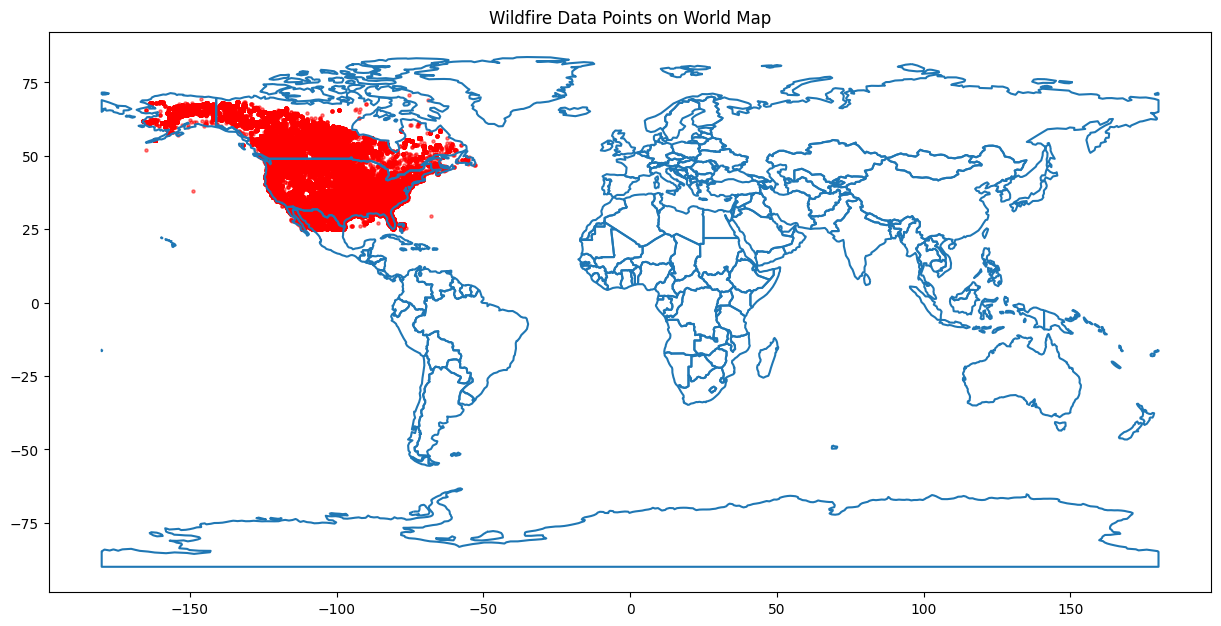

In [33]:
# Load a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the base map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)

# Plot wildfire data points on the base map
geo_wfp.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.5)
plt.title('Wildfire Data Points on World Map')
plt.show()

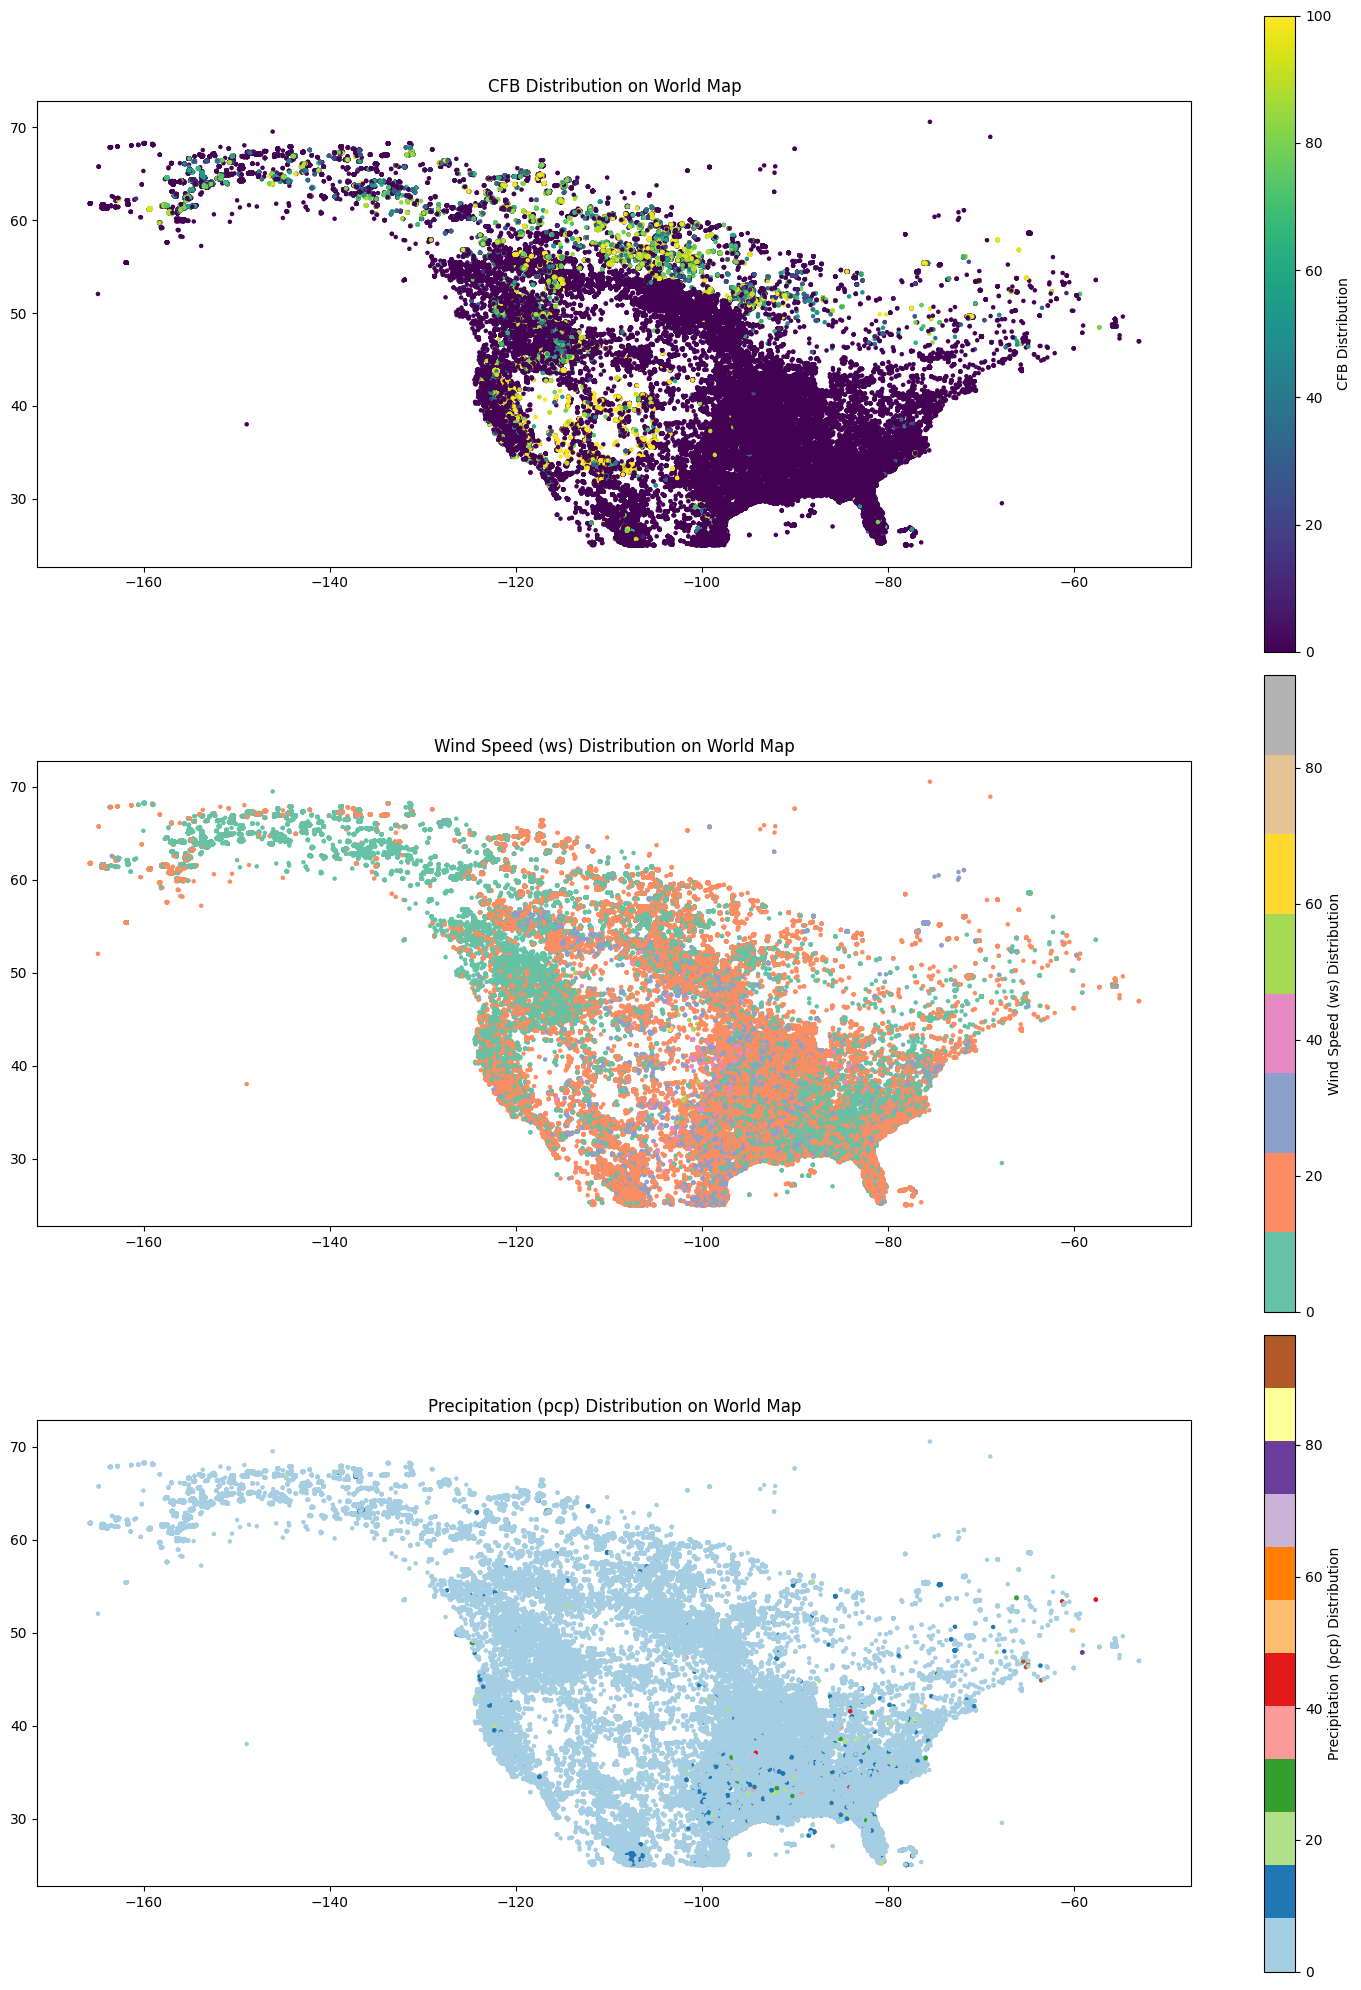

In [34]:
# Specific Visualizations for CFB, Wind Speed, and Precipitation
fig, axes = plt.subplots(3, 1, figsize=(15, 20))

# CFB Distribution
geo_wfp.plot(column='cfb', ax=axes[0], legend=True, legend_kwds={'label': "CFB Distribution"}, cmap='viridis', markersize=5)
axes[0].set_title('CFB Distribution on World Map')

# Wind Speed (ws) Distribution
geo_wfp.plot(column='ws', ax=axes[1], legend=True, legend_kwds={'label': "Wind Speed (ws) Distribution"}, cmap='Set2', markersize=5)
axes[1].set_title('Wind Speed (ws) Distribution on World Map')

# Precipitation (pcp) Distribution
geo_wfp.plot(column='pcp', ax=axes[2], legend=True, legend_kwds={'label': "Precipitation (pcp) Distribution"}, cmap='Paired', markersize=5)
axes[2].set_title('Precipitation (pcp) Distribution on World Map')

plt.tight_layout()
plt.show()

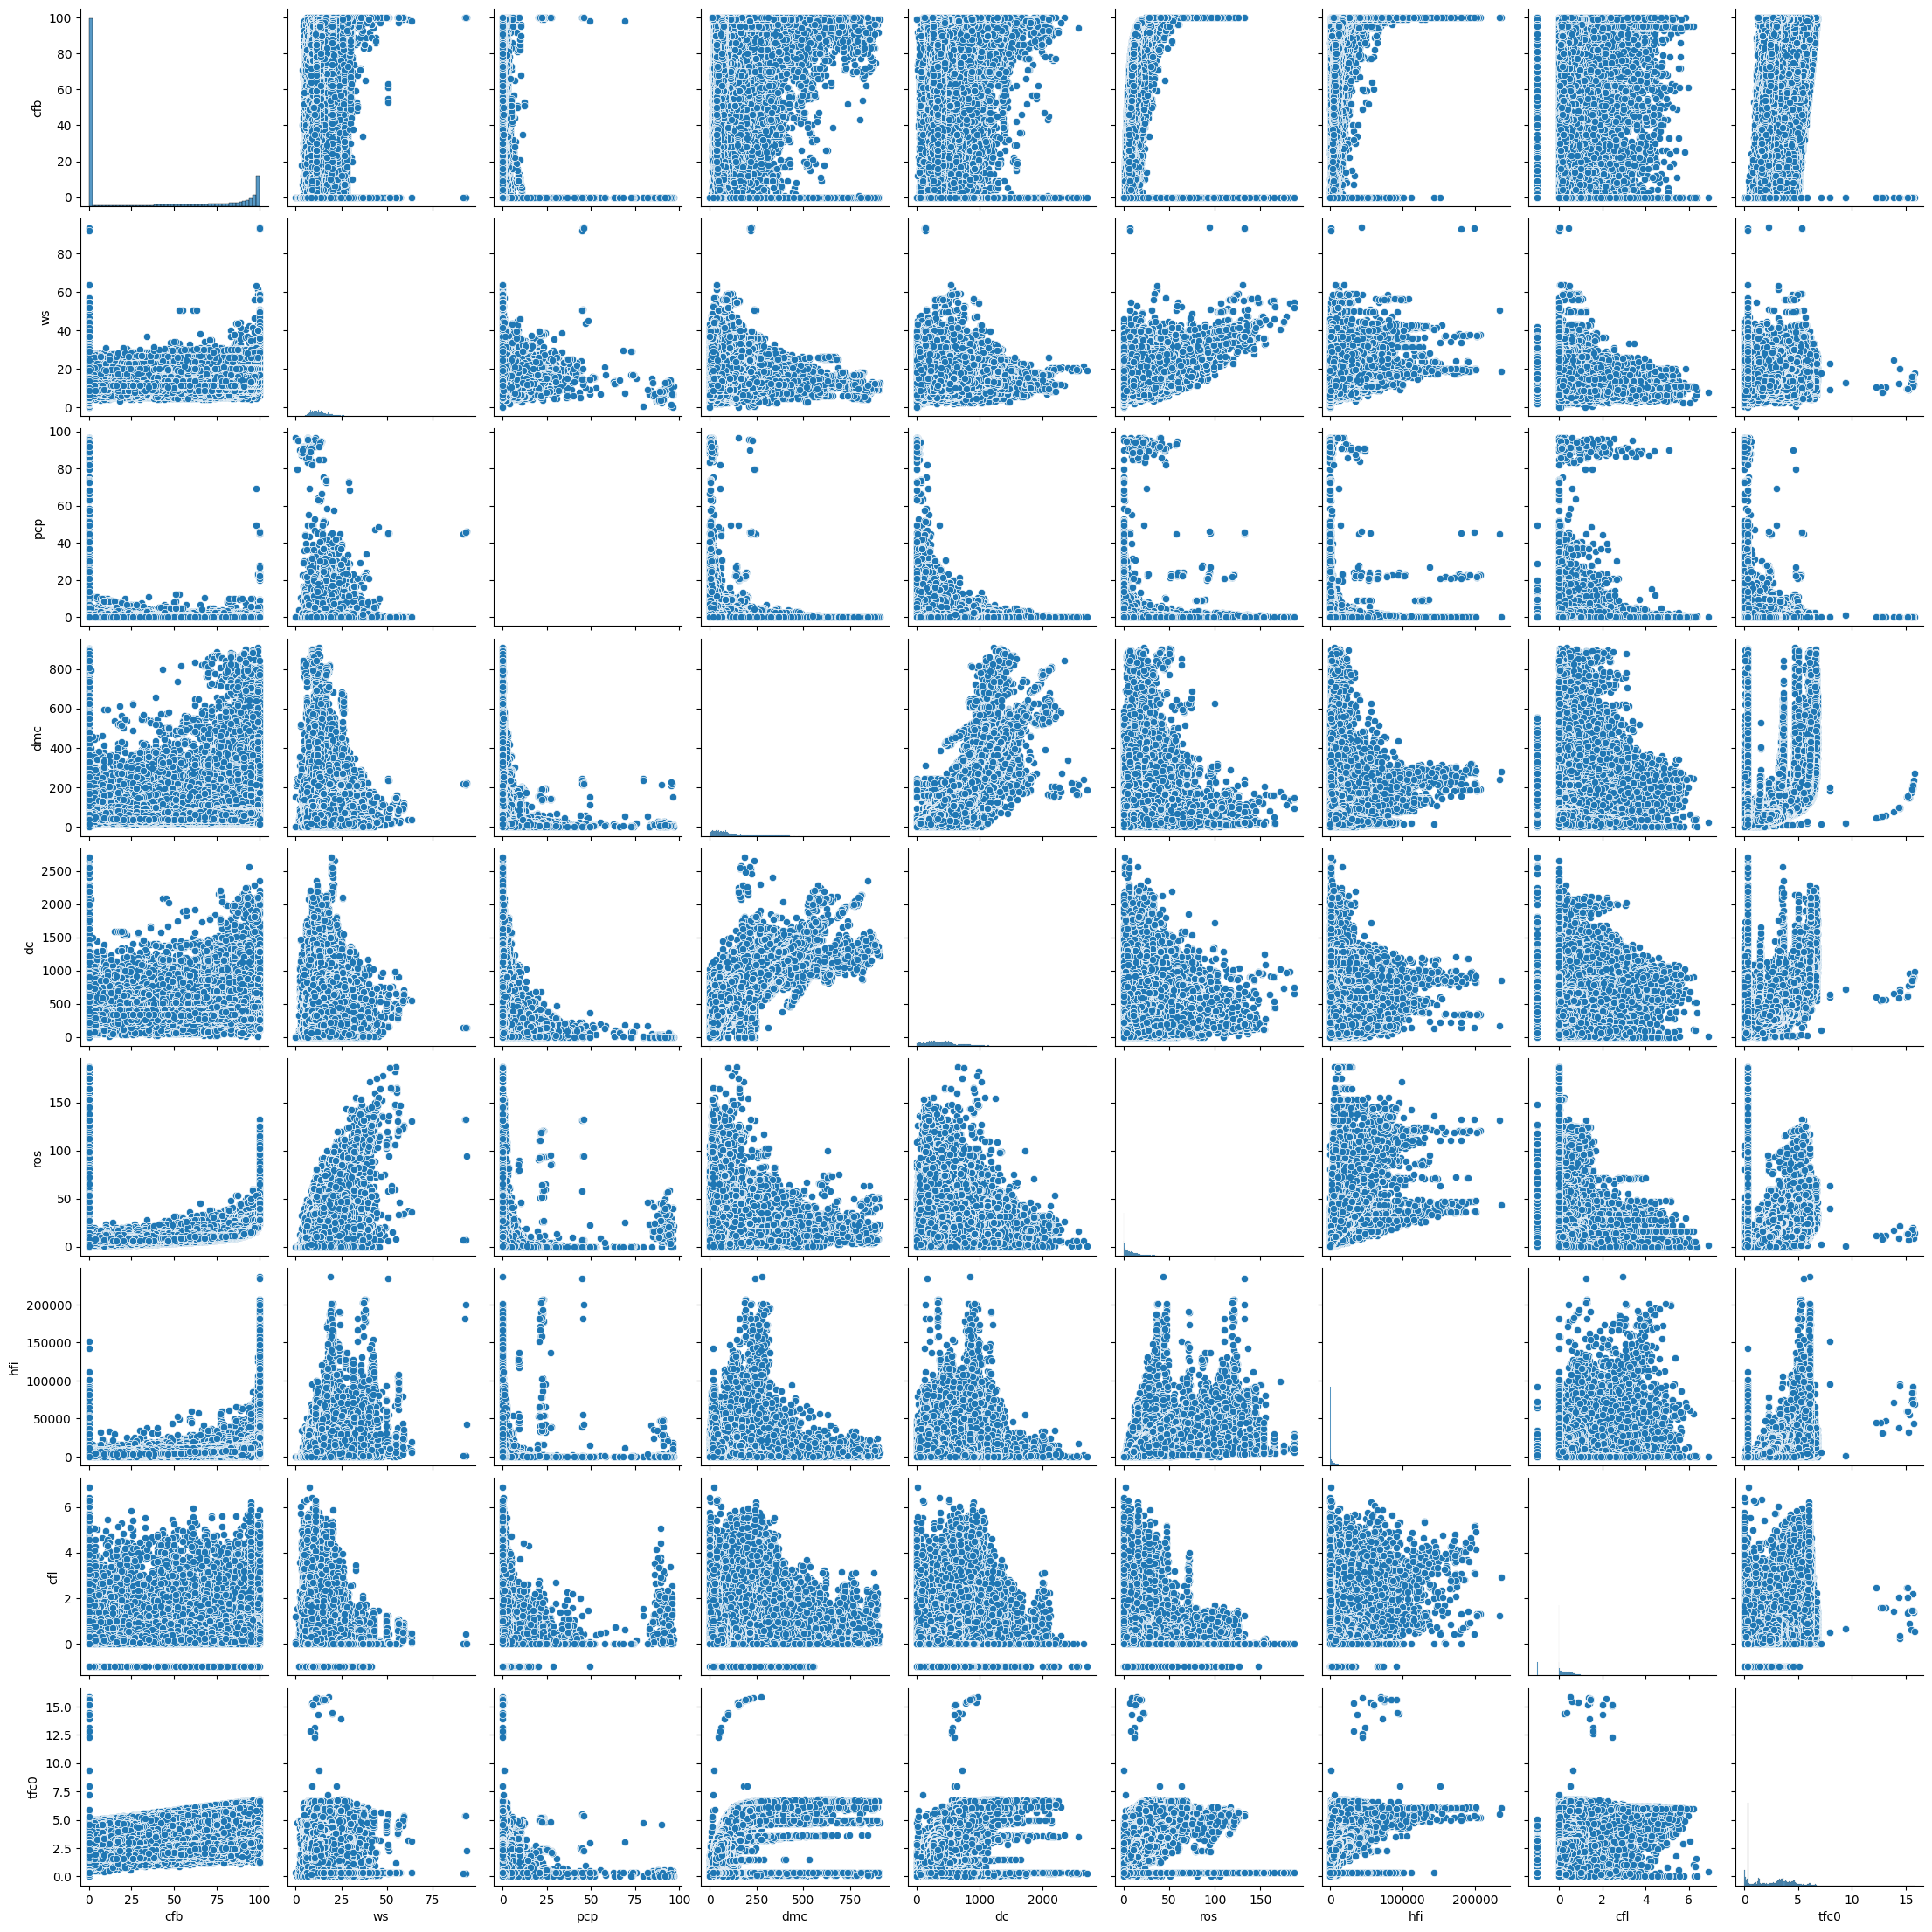

In [35]:
# Pairplot using Seaborn to see relationships between features and the target variable
pairplot_columns = ['cfb', 'ws', 'pcp', 'dmc', 'dc', 'ros', 'hfi', 'cfl', 'tfc0']
sns.pairplot(geo_wfp[pairplot_columns])
plt.show()

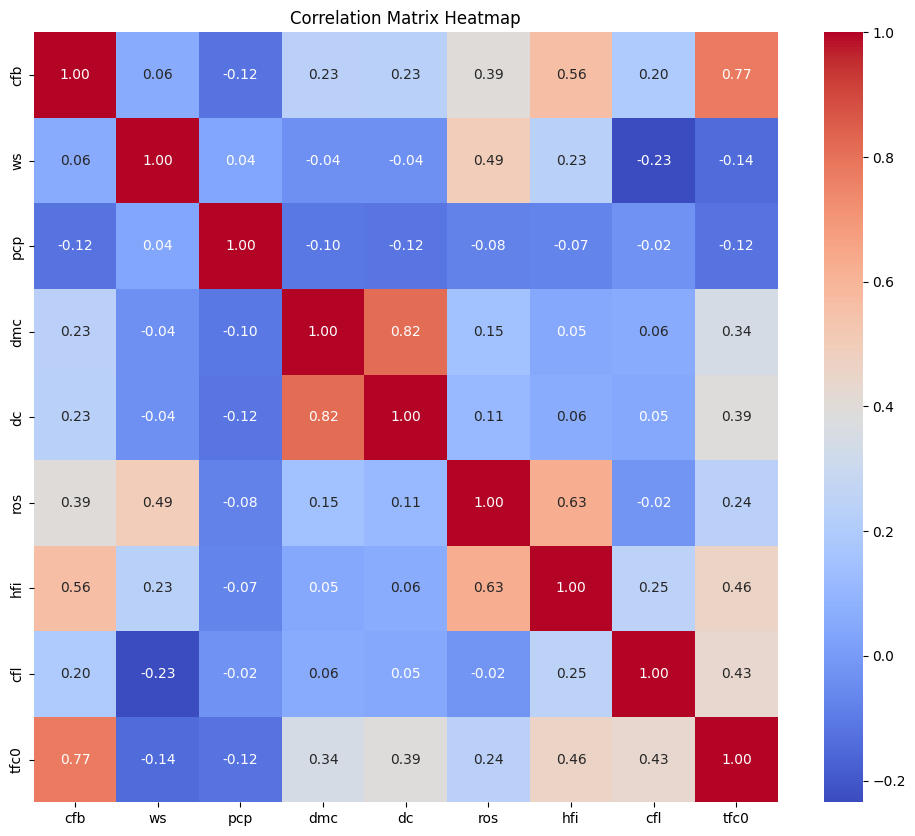

In [36]:
# Heatmap for Multicollinearity
plt.figure(figsize=(12, 10))
corr_matrix = geo_wfp[pairplot_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()